# Homework: Data Retrieval and Processing

Course: MO-IT148 - Applications Development and Emerging Technologies  
Week: 6  
Section: S3101  
Group: Group X  
Date: June 10, 2025  

---

## Assignment Objective

This homework demonstrates how to retrieve IoT sensor data from a blockchain (built in Milestone 1), clean and structure it for analysis, and prepare it for real-world applications.


---

## Step 1: Environment Setup and Blockchain Connection

First, we'll establish connection to our Ganache blockchain and load the smart contract from Milestone 1.


In [22]:
# Import required libraries for blockchain interaction and data processing
from web3 import Web3
import pandas as pd
import numpy as np
import json
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import display  # Add display function for notebook output
warnings.filterwarnings('ignore')

# Set up visualization style
plt.style.use('default')
sns.set_palette("husl")

print("All required libraries imported successfully!")
print("Visualization settings configured")

All required libraries imported successfully!
Visualization settings configured


In [23]:
# Connect to Ganache blockchain (from Milestone 1)
ganache_url = "http://127.0.0.1:7545"  # Default Ganache URL
web3 = Web3(Web3.HTTPProvider(ganache_url))

# Verify blockchain connection
print("Blockchain Connection Status:")
print(f"   Connected: {web3.is_connected()}")

if web3.is_connected():
    print(f"   Current block number: {web3.eth.block_number}")
    print(f"   Chain ID: {web3.eth.chain_id}")
    print(f"   Available accounts: {len(web3.eth.accounts)}")
    print("   Ready to proceed with data retrieval!")
else:
    print("   Connection failed! Please ensure Ganache is running.")
    print("   Troubleshooting tips:")
    print("      - Check if Ganache application is open")
    print("      - Verify the port number (7545 vs 8545)")
    print("      - Restart Ganache if necessary")

Blockchain Connection Status:
   Connected: True
   Current block number: 114
   Chain ID: 1337
   Available accounts: 10
   Ready to proceed with data retrieval!


In [24]:
# Load Smart Contract from Milestone 1
# TODO: Update these values with your actual contract details from Milestone 1

# Your contract address from Milestone 1 deployment (convert to checksum format)
contract_address_raw = "0xBbEde627aCF9aa814C667a46E27fb8a29227f509"  # UPDATE THIS
contract_address = web3.to_checksum_address(contract_address_raw)

# Contract ABI (Application Binary Interface) - Complete ABI from deployed contract
contract_abi = [
    {
        "inputs": [],
        "stateMutability": "nonpayable",
        "type": "constructor"
    },
    {
        "anonymous": False,
        "inputs": [
            {
                "indexed": False,
                "internalType": "uint256",
                "name": "blockchainTimestamp",
                "type": "uint256"
            },
            {
                "indexed": False,
                "internalType": "string",
                "name": "originalTimestamp",
                "type": "string"
            },
            {
                "indexed": False,
                "internalType": "string",
                "name": "packageId",
                "type": "string"
            },
            {
                "indexed": False,
                "internalType": "string",
                "name": "rfidTag",
                "type": "string"
            },
            {
                "indexed": False,
                "internalType": "string",
                "name": "latitude",
                "type": "string"
            },
            {
                "indexed": False,
                "internalType": "string",
                "name": "longitude",
                "type": "string"
            },
            {
                "indexed": False,
                "internalType": "string",
                "name": "temperatureC",
                "type": "string"
            },
            {
                "indexed": False,
                "internalType": "string",
                "name": "deviceId",
                "type": "string"
            }
        ],
        "name": "LogisticsDataStored",
        "type": "event"
    },
    {
        "inputs": [
            {
                "internalType": "string",
                "name": "_originalTimestamp",
                "type": "string"
            },
            {
                "internalType": "string",
                "name": "_packageId",
                "type": "string"
            },
            {
                "internalType": "string",
                "name": "_rfidTag",
                "type": "string"
            },
            {
                "internalType": "string",
                "name": "_latitude",
                "type": "string"
            },
            {
                "internalType": "string",
                "name": "_longitude",
                "type": "string"
            },
            {
                "internalType": "string",
                "name": "_temperatureC",
                "type": "string"
            },
            {
                "internalType": "string",
                "name": "_deviceId",
                "type": "string"
            }
        ],
        "name": "storeLogisticsData",
        "outputs": [],
        "stateMutability": "nonpayable",
        "type": "function"
    },
    {
        "inputs": [
            {
                "internalType": "uint256",
                "name": "index",
                "type": "uint256"
            }
        ],
        "name": "getLogisticsRecord",
        "outputs": [
            {
                "internalType": "uint256",
                "name": "blockchainTimestamp",
                "type": "uint256"
            },
            {
                "internalType": "string",
                "name": "originalTimestamp",
                "type": "string"
            },
            {
                "internalType": "string",
                "name": "packageId",
                "type": "string"
            },
            {
                "internalType": "string",
                "name": "rfidTag",
                "type": "string"
            },
            {
                "internalType": "string",
                "name": "latitude",
                "type": "string"
            },
            {
                "internalType": "string",
                "name": "longitude",
                "type": "string"
            },
            {
                "internalType": "string",
                "name": "temperatureC",
                "type": "string"
            },
            {
                "internalType": "string",
                "name": "deviceId",
                "type": "string"
            }
        ],
        "stateMutability": "view",
        "type": "function"
    },
    {
        "inputs": [],
        "name": "getTotalRecords",
        "outputs": [
            {
                "internalType": "uint256",
                "name": "",
                "type": "uint256"
            }
        ],
        "stateMutability": "view",
        "type": "function"
    },
    {
        "inputs": [
            {
                "internalType": "uint256",
                "name": "",
                "type": "uint256"
            }
        ],
        "name": "logisticsRecords",
        "outputs": [
            {
                "internalType": "uint256",
                "name": "blockchainTimestamp",
                "type": "uint256"
            },
            {
                "internalType": "string",
                "name": "originalTimestamp",
                "type": "string"
            },
            {
                "internalType": "string",
                "name": "packageId",
                "type": "string"
            },
            {
                "internalType": "string",
                "name": "rfidTag",
                "type": "string"
            },
            {
                "internalType": "string",
                "name": "latitude",
                "type": "string"
            },
            {
                "internalType": "string",
                "name": "longitude",
                "type": "string"
            },
            {
                "internalType": "string",
                "name": "temperatureC",
                "type": "string"
            },
            {
                "internalType": "string",
                "name": "deviceId",
                "type": "string"
            }
        ],
        "stateMutability": "view",
        "type": "function"
    },
    {
        "inputs": [],
        "name": "MAX_ENTRIES",
        "outputs": [
            {
                "internalType": "uint256",
                "name": "",
                "type": "uint256"
            }
        ],
        "stateMutability": "view",
        "type": "function"
    },
    {
        "inputs": [],
        "name": "owner",
        "outputs": [
            {
                "internalType": "address",
                "name": "",
                "type": "address"
            }
        ],
        "stateMutability": "view",
        "type": "function"
    }
]

# Create contract instance
try:
    contract = web3.eth.contract(address=contract_address, abi=contract_abi)
    print("Smart Contract Loaded Successfully!")
    print(f"   Contract Address: {contract_address}")
    print(f"   Available Functions: getTotalRecords, getLogisticsRecord, storeLogisticsData, logisticsRecords, MAX_ENTRIES, owner")
    print(f"   Events: LogisticsDataStored")
    print("   Ready for data retrieval operations")
except Exception as e:
    print(f"Error loading contract: {str(e)}")
    print("Please verify:")
    print("   - Contract address is correct")
    print("   - ABI matches your deployed contract")
    print("   - Contract is actually deployed on this blockchain")

Smart Contract Loaded Successfully!
   Contract Address: 0xBbEde627aCF9aa814C667a46E27fb8a29227f509
   Available Functions: getTotalRecords, getLogisticsRecord, storeLogisticsData, logisticsRecords, MAX_ENTRIES, owner
   Events: LogisticsDataStored
   Ready for data retrieval operations


## Step 2: Get Total Number of Stored Records

Now we'll check how many IoT records are stored in our blockchain ledger from Milestone 1.

In [25]:
# Get the total number of stored records from blockchain
try:
    total_records = contract.functions.getTotalRecords().call()
    print(f"Total IoT records stored on blockchain: {total_records}")
    
    if total_records == 0:
        print("No records found in the blockchain!")
        print("Possible reasons:")
        print("   - Milestone 1 data hasn't been stored yet")
        print("   - Wrong contract address")
        print("   - Contract deployment issue")
        print("\nNext steps:")
        print("   1. Verify Milestone 1 completion")
        print("   2. Check contract address")
        print("   3. Re-run Milestone 1 data storage if needed")
    else:
        print(f"Excellent! Ready to retrieve {total_records} records")
        print(f"This represents {total_records} IoT sensor readings from your supply chain simulation")
        print("Proceeding to data retrieval phase")
        
except Exception as e:
    print(f"Error getting total records: {str(e)}")
    print("Troubleshooting suggestions:")
    print("   - Verify contract function name (getTotalRecords vs totalRecords)")
    print("   - Check if contract is properly deployed")
    print("   - Ensure blockchain connection is stable")

Total IoT records stored on blockchain: 100
Excellent! Ready to retrieve 100 records
This represents 100 IoT sensor readings from your supply chain simulation
Proceeding to data retrieval phase


## Step 3: Retrieve All IoT Data from Blockchain

We'll now fetch all stored IoT records and organize them into a structured Pandas DataFrame for analysis.

In [26]:
# Retrieve all IoT records from the blockchain
print("Starting data retrieval from blockchain...")

# Check if total_records is defined, if not, get it from the contract
try:
    total_records
    print(f"Retrieving {total_records} records...")
except NameError:
    print("total_records not defined. Getting from contract...")
    try:
        total_records = contract.functions.getTotalRecords().call()
        print(f"Retrieved total_records from contract: {total_records}")
    except Exception as e:
        print(f"Error getting total records: {str(e)}")
        print("Cannot proceed without total record count. Please run previous cells first.")
        raise

data = []
successful_retrievals = 0
failed_retrievals = 0

# Loop through all stored records
for i in range(total_records):
    try:
        # Get record from smart contract (using correct function name from ABI)
        record = contract.functions.getLogisticsRecord(i).call()
        
        # Structure the data according to your smart contract
        # TODO: Adjust field mapping based on your contract structure
        data.append({
            "record_id": i,
            "blockchain_timestamp": record[0],  # Unix timestamp when stored on blockchain
            "original_timestamp": record[1],    # Original IoT sensor timestamp
            "package_id": record[2],           # Package identifier
            "rfid_tag": record[3],             # RFID tag number
            "latitude": record[4],             # GPS latitude
            "longitude": record[5],            # GPS longitude
            "temperature_celsius": record[6],   # Temperature reading
            "device_id": record[7]             # IoT device identifier
        })
        
        successful_retrievals += 1
        
        # Progress indicator (safe division)
        if total_records > 0 and (i + 1) % max(1, total_records // 10) == 0:  # Show progress every 10%
            progress = ((i + 1) / total_records) * 100
            print(f"   Progress: {progress:.0f}% ({i + 1}/{total_records} records)")
        
    except Exception as e:
        failed_retrievals += 1
        print(f"   Error retrieving record {i}: {str(e)}")

# Create DataFrame from retrieved data
df = pd.DataFrame(data)

# Summary of retrieval operation
print("\nData Retrieval Summary:")
print(f"   Successfully retrieved: {successful_retrievals} records")
print(f"   Failed retrievals: {failed_retrievals} records")
print(f"   DataFrame shape: {df.shape} (rows × columns)")

if total_records > 0:
    print(f"   Success rate: {(successful_retrievals / total_records * 100):.1f}%")
else:
    print("   No records to process")

if len(df) > 0:
    print("\nData retrieval completed successfully!")
    print("Ready for data cleaning and analysis phase")
else:
    print("\nNo data retrieved! Please check contract and blockchain connection.")

Starting data retrieval from blockchain...
Retrieving 100 records...
   Progress: 10% (10/100 records)
   Progress: 20% (20/100 records)
   Progress: 10% (10/100 records)
   Progress: 20% (20/100 records)
   Progress: 30% (30/100 records)
   Progress: 40% (40/100 records)
   Progress: 30% (30/100 records)
   Progress: 40% (40/100 records)
   Progress: 50% (50/100 records)
   Progress: 60% (60/100 records)
   Progress: 50% (50/100 records)
   Progress: 60% (60/100 records)
   Progress: 70% (70/100 records)
   Progress: 80% (80/100 records)
   Progress: 70% (70/100 records)
   Progress: 80% (80/100 records)
   Progress: 90% (90/100 records)
   Progress: 100% (100/100 records)

Data Retrieval Summary:
   Successfully retrieved: 100 records
   Failed retrievals: 0 records
   DataFrame shape: (100, 9) (rows × columns)
   Success rate: 100.0%

Data retrieval completed successfully!
Ready for data cleaning and analysis phase
   Progress: 90% (90/100 records)
   Progress: 100% (100/100 records

In [27]:
# Debug: Check data retrieval results
print(f"Debugging data retrieval:")
print(f"   Total records expected: {total_records}")
print(f"   Successful retrievals: {successful_retrievals}")
print(f"   Failed retrievals: {failed_retrievals}")
print(f"   Data list length: {len(data)}")
print(f"   DataFrame shape: {df.shape}")
print(f"   DataFrame empty: {df.empty}")

# Test individual record retrieval to diagnose the issue
print(f"\nTesting individual record retrieval:")
try:
    print("Attempting to retrieve record 0...")
    test_record = contract.functions.getLogisticsRecord(0).call()
    print(f"Record 0 retrieved successfully: {test_record}")
    print(f"   Record structure: {len(test_record)} fields")
    for i, field in enumerate(test_record):
        print(f"   Field {i}: {field} (type: {type(field)})")
except Exception as e:
    print(f"Error retrieving record 0: {str(e)}")
    print("This suggests an issue with the contract function or data structure")

# Convert timestamps and display initial data preview
if len(df) > 0:
    try:
        # Convert blockchain timestamp to readable datetime
        df["blockchain_datetime"] = pd.to_datetime(df["blockchain_timestamp"], unit="s")
        
        # Convert original timestamp to datetime
        df["original_datetime"] = pd.to_datetime(df["original_timestamp"])
        
        # Convert numeric string fields to proper types
        df["latitude_float"] = pd.to_numeric(df["latitude"], errors='coerce')
        df["longitude_float"] = pd.to_numeric(df["longitude"], errors='coerce')
        df["temperature_float"] = pd.to_numeric(df["temperature_celsius"], errors='coerce')
        
        print("Timestamp Conversion Completed")
        print("Numeric Conversion Completed")
        
        print("\nFirst 5 records from blockchain:")
        display(df.head())
        
        print("\nDataFrame Information:")
        print(df.info())
        
        print("\nData Overview:")
        print(f"   Unique packages: {df['package_id'].nunique()}")
        print(f"   Unique devices: {df['device_id'].nunique()}")
        print(f"   Date range: {df['original_datetime'].min()} to {df['original_datetime'].max()}")
        print(f"   Blockchain storage time span: {df['blockchain_datetime'].min()} to {df['blockchain_datetime'].max()}")
        
        # Data quality checks
        print(f"\nData Quality Checks:")
        print(f"   Temperature range: {df['temperature_float'].min():.2f}°C to {df['temperature_float'].max():.2f}°C")
        print(f"   Latitude range: {df['latitude_float'].min():.6f} to {df['latitude_float'].max():.6f}")
        print(f"   Longitude range: {df['longitude_float'].min():.6f} to {df['longitude_float'].max():.6f}")
        print(f"   Missing temperature values: {df['temperature_float'].isna().sum()}")
        print(f"   Missing coordinate values: {df['latitude_float'].isna().sum() + df['longitude_float'].isna().sum()}")
        
    except Exception as e:
        print(f"Error during data conversion: {str(e)}")
        print("Some data fields may need manual conversion")
        
        # Still show basic info even if conversion fails
        print("\nBasic Data Preview:")
        print(df.head())
        
else:
    print("No data available for analysis. Please resolve retrieval issues first.")
    if failed_retrievals > 0:
        print(f"Hint: {failed_retrievals} out of {total_records} records failed to retrieve")
        print("   Check the blockchain node and contract function calls")

Debugging data retrieval:
   Total records expected: 100
   Successful retrievals: 100
   Failed retrievals: 0
   Data list length: 100
   DataFrame shape: (100, 9)
   DataFrame empty: False

Testing individual record retrieval:
Attempting to retrieve record 0...
Record 0 retrieved successfully: [1747865886, '2025-05-10 10:00:00', 'PKG_DUMMY_001', 'RFID_DUMMY_TEST_A', '14.500000', '121.000000', '27.5', 'Tracker_Dev_Dummy']
   Record structure: 8 fields
   Field 0: 1747865886 (type: <class 'int'>)
   Field 1: 2025-05-10 10:00:00 (type: <class 'str'>)
   Field 2: PKG_DUMMY_001 (type: <class 'str'>)
   Field 3: RFID_DUMMY_TEST_A (type: <class 'str'>)
   Field 4: 14.500000 (type: <class 'str'>)
   Field 5: 121.000000 (type: <class 'str'>)
   Field 6: 27.5 (type: <class 'str'>)
   Field 7: Tracker_Dev_Dummy (type: <class 'str'>)
Timestamp Conversion Completed
Numeric Conversion Completed

First 5 records from blockchain:
Record 0 retrieved successfully: [1747865886, '2025-05-10 10:00:00', '

,record_id,blockchain_timestamp,original_timestamp,package_id,rfid_tag,latitude,longitude,temperature_celsius,device_id,blockchain_datetime,original_datetime,latitude_float,longitude_float,temperature_float
0,0,1747865886,2025-05-10 10:00:00,PKG_DUMMY_001,RFID_DUMMY_TEST_A,14.500000,121.000000,27.5,Tracker_Dev_Dummy,2025-05-21 22:18:06,2025-05-10 10:00:00,14.500000,121.000000,27.50
1,1,1747866307,2025-05-09 04:49:40,PKG1001,RFID_82074261_A,14.598842,120.984874,3.58,Tracker_Dev_101,2025-05-21 22:25:07,2025-05-09 04:49:40,14.598842,120.984874,3.58
2,2,1747866307,2025-05-09 04:51:40,PKG1003,RFID_56419767_A,14.597552,120.988724,5.45,Tracker_Dev_102,2025-05-21 22:25:07,2025-05-09 04:51:40,14.597552,120.988724,5.45
3,3,1747866307,2025-05-09 04:56:40,PKG1004,RFID_28192170_A,14.599729,120.98994,4.22,Tracker_Dev_103,2025-05-21 22:25:07,2025-05-09 04:56:40,14.599729,120.989940,4.22
4,4,1747866307,2025-05-09 05:01:40,PKG1007,RFID_66393603_B,14.600436,120.990858,3.92,Tracker_Dev_104,2025-05-21 22:25:07,2025-05-09 05:01:40,14.600436,120.990858,3.92



DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   record_id             100 non-null    int64         
 1   blockchain_timestamp  100 non-null    int64         
 2   original_timestamp    100 non-null    object        
 3   package_id            100 non-null    object        
 4   rfid_tag              100 non-null    object        
 5   latitude              100 non-null    object        
 6   longitude             100 non-null    object        
 7   temperature_celsius   100 non-null    object        
 8   device_id             100 non-null    object        
 9   blockchain_datetime   100 non-null    datetime64[ns]
 10  original_datetime     100 non-null    datetime64[ns]
 11  latitude_float        100 non-null    float64       
 12  longitude_float       100 non-null    float64       
 1

## Step 4: Data Cleaning and Preprocessing

Now we'll clean the retrieved data, handle missing values, and convert text fields to appropriate numerical formats.

In [28]:
# DATA CLEANING AND PREPROCESSING PHASE
print("Starting comprehensive data cleaning...")
df_clean = df.copy()

# 1. Missing Values Analysis
print("\nMissing Values Analysis:")
missing_info = df_clean.isnull().sum()
total_rows = len(df_clean)
for col, missing_count in missing_info.items():
    missing_pct = (missing_count / total_rows) * 100
    print(f"   {col}: {missing_count} missing ({missing_pct:.1f}%)")

if missing_info.sum() == 0:
    print("   No missing values found!")

# 2. Data Type Validation
print("\nData type validation...")
# The numeric columns are already converted, let's use the cleaned versions
df_clean['latitude'] = df_clean['latitude_float']
df_clean['longitude'] = df_clean['longitude_float'] 
df_clean['temperature_celsius'] = df_clean['temperature_float']

# Remove the duplicate columns
df_clean = df_clean.drop(['latitude_float', 'longitude_float', 'temperature_float'], axis=1)
print("   Using pre-converted numeric columns")

# 3. Data Validation and Range Checks
print("\nData validation checks:")

# Temperature validation (typical range: -50°C to 60°C for logistics)
temp_range = (-50, 60)
temp_outliers = df_clean[
    (df_clean['temperature_celsius'] < temp_range[0]) | 
    (df_clean['temperature_celsius'] > temp_range[1])
]
print(f"   Temperature outliers (outside {temp_range}°C): {len(temp_outliers)}")

# Coordinate validation (basic range checks)
lat_range = (-90, 90)
lon_range = (-180, 180)
coord_outliers = df_clean[
    (df_clean['latitude'] < lat_range[0]) | (df_clean['latitude'] > lat_range[1]) |
    (df_clean['longitude'] < lon_range[0]) | (df_clean['longitude'] > lon_range[1])
]
print(f"   Coordinate outliers: {len(coord_outliers)}")

# 4. Remove duplicates
print("\nDuplicate detection:")
initial_count = len(df_clean)
df_clean = df_clean.drop_duplicates()
duplicates_removed = initial_count - len(df_clean)
print(f"   Duplicates removed: {duplicates_removed}")

# 5. Handle any remaining issues
print("\nFinal data quality checks:")
final_missing = df_clean.isnull().sum().sum()
print(f"   Remaining missing values: {final_missing}")
print(f"   Final dataset size: {len(df_clean)} records")

# 6. Create data quality summary
print("\nData Quality Summary:")
print(f"   Records processed: {len(df)} → {len(df_clean)}")
print(f"   Data completeness: {((1 - final_missing / (len(df_clean) * len(df_clean.columns))) * 100):.1f}%")
print(f"   Unique packages: {df_clean['package_id'].nunique()}")
print(f"   Unique devices: {df_clean['device_id'].nunique()}")
print(f"   Temperature range: {df_clean['temperature_celsius'].min():.1f}°C to {df_clean['temperature_celsius'].max():.1f}°C")
print(f"   Location coverage: Lat {df_clean['latitude'].min():.3f}° to {df_clean['latitude'].max():.3f}°")
print(f"                    Lon {df_clean['longitude'].min():.3f}° to {df_clean['longitude'].max():.3f}°")

print("\nData cleaning completed successfully!")
print("Dataset ready for analysis phase")

Starting comprehensive data cleaning...

Missing Values Analysis:
   record_id: 0 missing (0.0%)
   blockchain_timestamp: 0 missing (0.0%)
   original_timestamp: 0 missing (0.0%)
   package_id: 0 missing (0.0%)
   rfid_tag: 0 missing (0.0%)
   latitude: 0 missing (0.0%)
   longitude: 0 missing (0.0%)
   temperature_celsius: 0 missing (0.0%)
   device_id: 0 missing (0.0%)
   blockchain_datetime: 0 missing (0.0%)
   original_datetime: 0 missing (0.0%)
   latitude_float: 0 missing (0.0%)
   longitude_float: 0 missing (0.0%)
   temperature_float: 0 missing (0.0%)
   No missing values found!

Data type validation...
   Using pre-converted numeric columns

Data validation checks:
   Temperature outliers (outside (-50, 60)°C): 0
   Coordinate outliers: 0

Duplicate detection:
   Duplicates removed: 0

Final data quality checks:
   Remaining missing values: 0
   Final dataset size: 100 records

Data Quality Summary:
   Records processed: 100 → 100
   Data completeness: 100.0%
   Unique package

## Step 5: Data Analysis and Insights

Perform statistical analysis and generate insights from the cleaned IoT data.

In [29]:
# Data Analysis and Insights Implementation
print("Starting comprehensive data analysis...")

if 'df_clean' in locals() and len(df_clean) > 0:
    print("\nStatistical Analysis:")
    
    # 1. Temperature Analysis
    temp_stats = df_clean['temperature_celsius'].describe()
    print(f"\nTemperature Statistics:")
    print(f"   Mean: {temp_stats['mean']:.2f}°C")
    print(f"   Median: {temp_stats['50%']:.2f}°C")
    print(f"   Std Dev: {temp_stats['std']:.2f}°C")
    print(f"   Range: {temp_stats['min']:.2f}°C to {temp_stats['max']:.2f}°C")
    
    # 2. Device Performance Analysis
    print(f"\nDevice Performance Analysis:")
    device_stats = df_clean.groupby('device_id').agg({
        'temperature_celsius': ['count', 'mean', 'std'],
        'package_id': 'nunique'
    }).round(2)
    
    device_stats.columns = ['Record_Count', 'Avg_Temp', 'Temp_StdDev', 'Unique_Packages']
    print(device_stats)
    
    # 3. Package Tracking Analysis
    print(f"\nPackage Tracking Analysis:")
    package_stats = df_clean.groupby('package_id').agg({
        'temperature_celsius': ['min', 'max', 'mean'],
        'device_id': 'first',
        'original_datetime': ['min', 'max']
    }).round(2)
    
    print(f"   Total unique packages tracked: {len(package_stats)}")
    print(f"   Avg tracking duration per package: {(df_clean['original_datetime'].max() - df_clean['original_datetime'].min()).total_seconds() / 3600:.1f} hours")
    
    # 4. Time-based Analysis
    print(f"\nTemporal Analysis:")
    df_clean['hour'] = df_clean['original_datetime'].dt.hour
    df_clean['day'] = df_clean['original_datetime'].dt.day
    
    hourly_temps = df_clean.groupby('hour')['temperature_celsius'].mean()
    print(f"   Coldest hour average: {hourly_temps.min():.2f}°C at {hourly_temps.idxmin()}:00")
    print(f"   Warmest hour average: {hourly_temps.max():.2f}°C at {hourly_temps.idxmax()}:00")
    
    # 5. Geographic Analysis
    print(f"\nGeographic Analysis:")
    lat_center = df_clean['latitude'].mean()
    lon_center = df_clean['longitude'].mean()
    lat_span = df_clean['latitude'].max() - df_clean['latitude'].min()
    lon_span = df_clean['longitude'].max() - df_clean['longitude'].min()
    
    print(f"   Geographic center: ({lat_center:.6f}, {lon_center:.6f})")
    print(f"   Coverage area: {lat_span:.6f}° × {lon_span:.6f}°")
    print(f"   Approximate distance covered: {lat_span * 111:.2f} km × {lon_span * 111:.2f} km")
    
    # 6. Business Insights
    print(f"\nBusiness Insights:")
    temp_violations = df_clean[df_clean['temperature_celsius'] > 7.0]  # Assuming 7°C is max for cold chain
    print(f"   Cold chain violations (>7°C): {len(temp_violations)} records ({len(temp_violations)/len(df_clean)*100:.1f}%)")
    
    if len(temp_violations) > 0:
        print(f"   Packages with violations: {temp_violations['package_id'].nunique()}")
        print(f"   Devices with violations: {temp_violations['device_id'].nunique()}")
    
    # 7. Data Quality Score
    quality_score = (len(df_clean) / len(df)) * 100
    print(f"\nOverall Data Quality Score: {quality_score:.1f}%")
    
    print(f"\nData analysis completed successfully!")
    
else:
    print("No cleaned data available for analysis. Please run data cleaning first.")

Starting comprehensive data analysis...

Statistical Analysis:

Temperature Statistics:
   Mean: 5.15°C
   Median: 4.85°C
   Std Dev: 2.50°C
   Range: 3.50°C to 27.50°C

Device Performance Analysis:
                   Record_Count  Avg_Temp  Temp_StdDev  Unique_Packages
device_id                                                              
Tracker_Dev_101              20      4.24         0.77               20
Tracker_Dev_102              20      5.32         1.45               20
Tracker_Dev_103              20      4.90         0.93               19
Tracker_Dev_104              20      5.03         0.92               19
Tracker_Dev_105              19      5.11         0.92               19
Tracker_Dev_Dummy             1     27.50          NaN                1

Package Tracking Analysis:
   Total unique packages tracked: 64
   Avg tracking duration per package: 29.2 hours

Temporal Analysis:
   Coldest hour average: 4.42°C at 4:00
   Warmest hour average: 6.66°C at 10:00

Geographi

## Step 6: Data Visualization

Create professional visualizations to understand patterns and trends in the IoT data.

Creating professional visualizations...


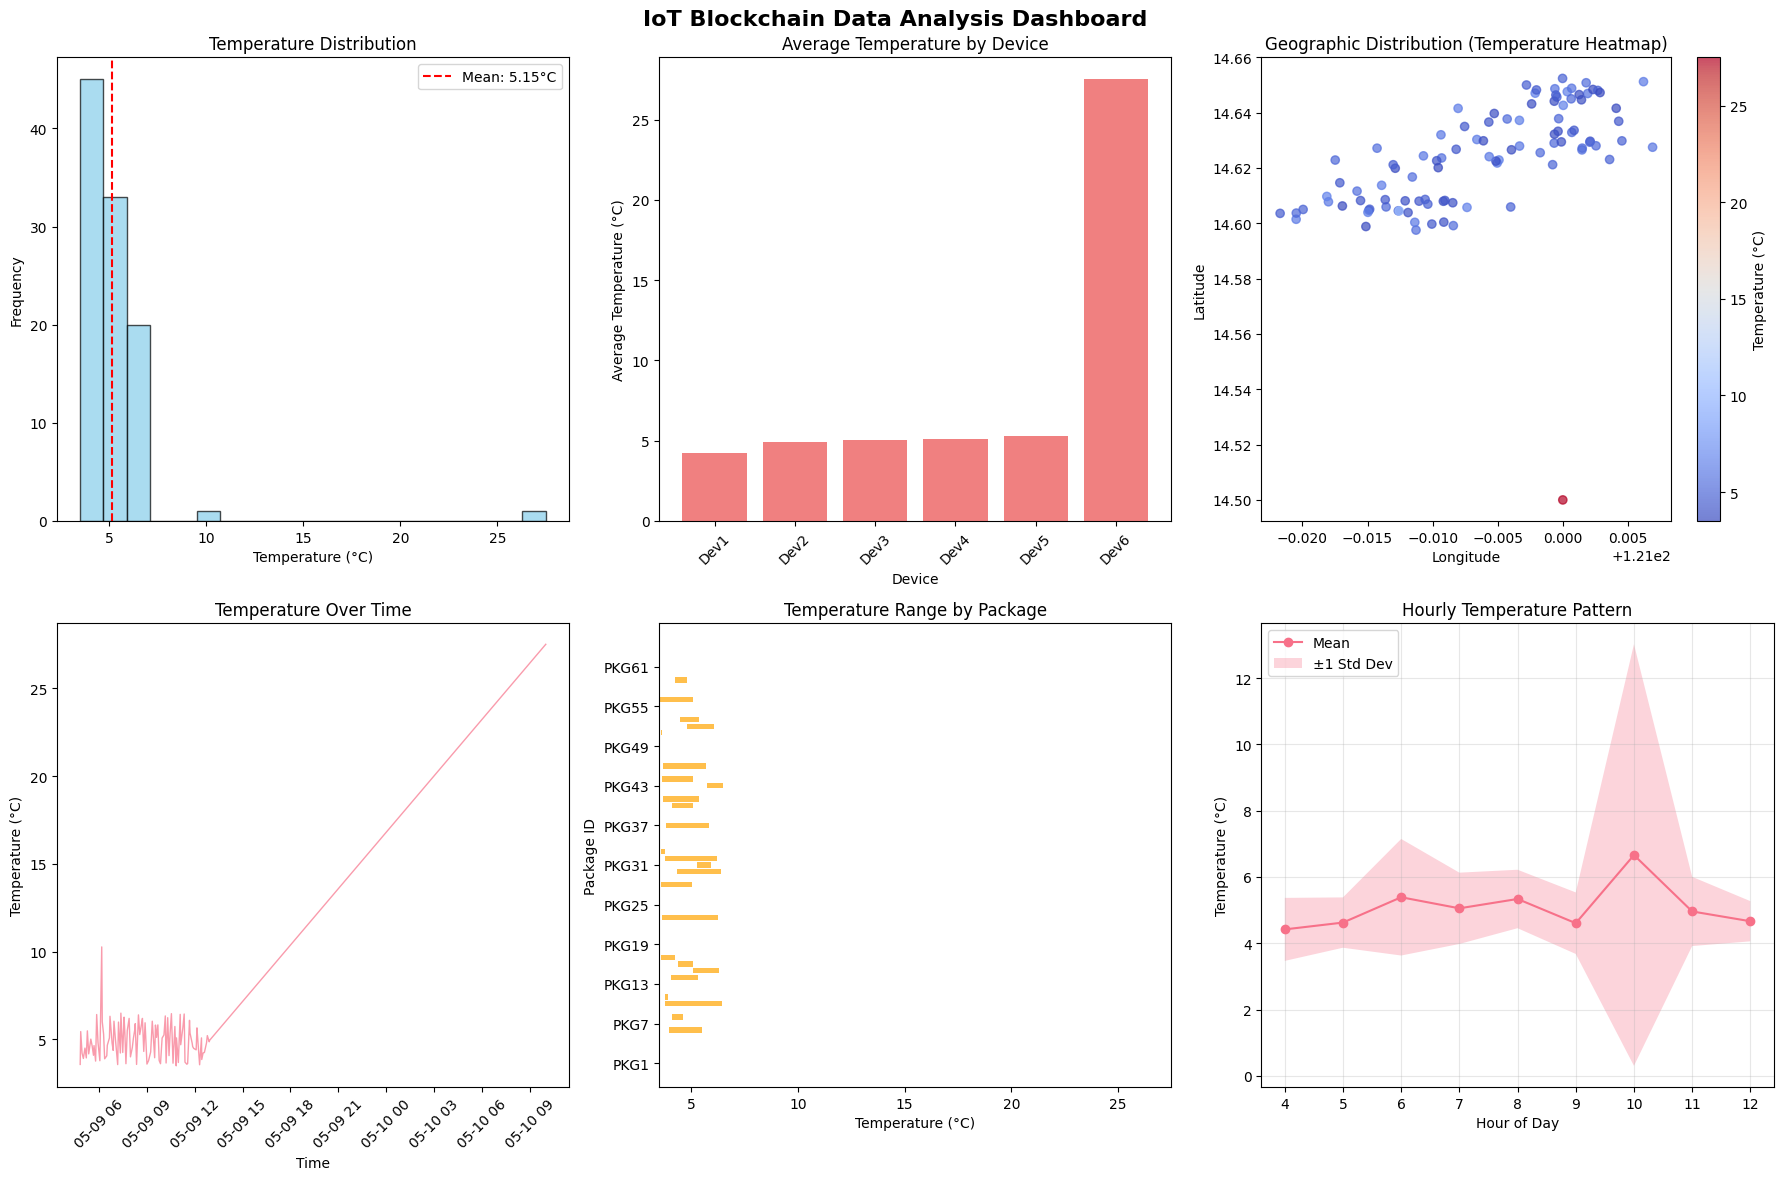


Creating additional business intelligence charts...


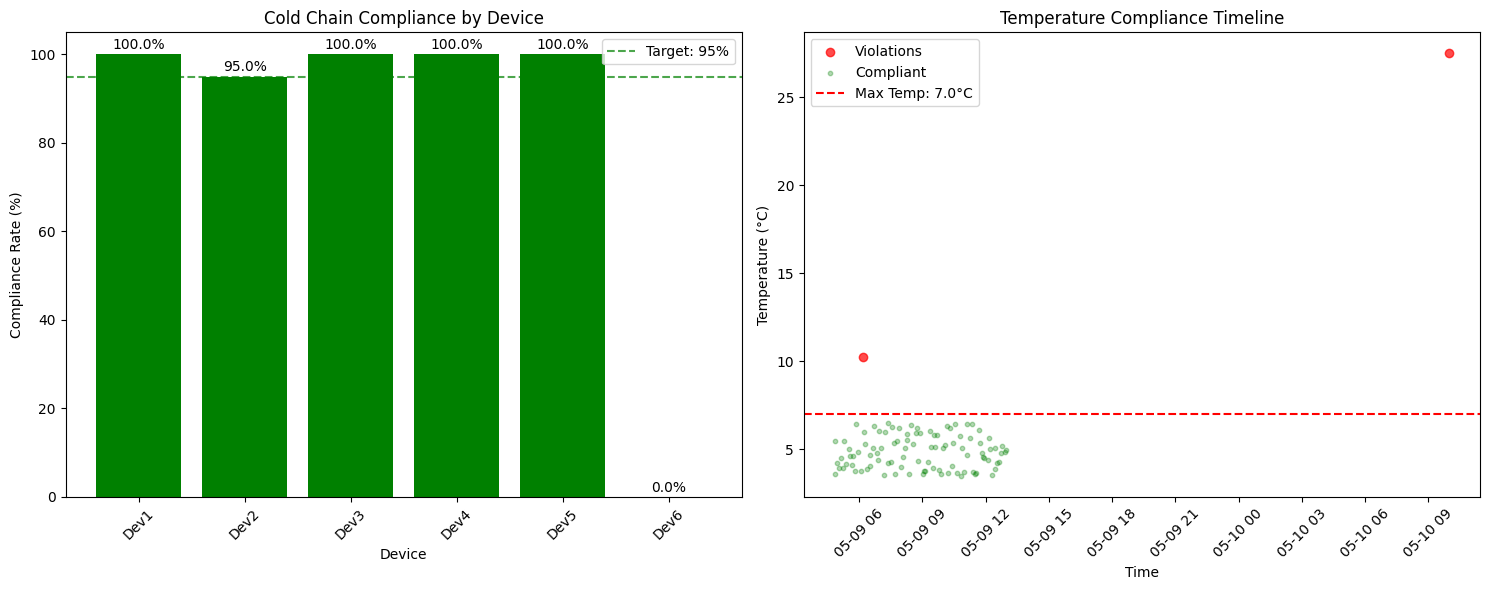

All visualizations created successfully!
Professional dashboard ready for business presentation


In [30]:
# Data Visualization Implementation
print("Creating professional visualizations...")

if 'df_clean' in locals() and len(df_clean) > 0:
    # Set up the plotting style
    plt.style.use('default')
    sns.set_palette("husl")
    
    # Create a comprehensive visualization dashboard
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('IoT Blockchain Data Analysis Dashboard', fontsize=16, fontweight='bold')
    
    # 1. Temperature Distribution
    axes[0, 0].hist(df_clean['temperature_celsius'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, 0].set_title('Temperature Distribution')
    axes[0, 0].set_xlabel('Temperature (°C)')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].axvline(df_clean['temperature_celsius'].mean(), color='red', linestyle='--', label=f'Mean: {df_clean["temperature_celsius"].mean():.2f}°C')
    axes[0, 0].legend()
    
    # 2. Device Performance Comparison
    device_temps = df_clean.groupby('device_id')['temperature_celsius'].mean().sort_values()
    axes[0, 1].bar(range(len(device_temps)), device_temps.values, color='lightcoral')
    axes[0, 1].set_title('Average Temperature by Device')
    axes[0, 1].set_xlabel('Device')
    axes[0, 1].set_ylabel('Average Temperature (°C)')
    axes[0, 1].set_xticks(range(len(device_temps)))
    axes[0, 1].set_xticklabels([f'Dev{i+1}' for i in range(len(device_temps))], rotation=45)
    
    # 3. Geographic Distribution
    scatter = axes[0, 2].scatter(df_clean['longitude'], df_clean['latitude'], 
                                c=df_clean['temperature_celsius'], cmap='coolwarm', alpha=0.7)
    axes[0, 2].set_title('Geographic Distribution (Temperature Heatmap)')
    axes[0, 2].set_xlabel('Longitude')
    axes[0, 2].set_ylabel('Latitude')
    plt.colorbar(scatter, ax=axes[0, 2], label='Temperature (°C)')
    
    # 4. Time Series Analysis
    df_clean_sorted = df_clean.sort_values('original_datetime')
    axes[1, 0].plot(df_clean_sorted['original_datetime'], df_clean_sorted['temperature_celsius'], 
                   alpha=0.7, linewidth=1)
    axes[1, 0].set_title('Temperature Over Time')
    axes[1, 0].set_xlabel('Time')
    axes[1, 0].set_ylabel('Temperature (°C)')
    axes[1, 0].tick_params(axis='x', rotation=45)
    
    # 5. Package Temperature Ranges
    package_ranges = df_clean.groupby('package_id')['temperature_celsius'].agg(['min', 'max', 'mean'])
    y_pos = range(len(package_ranges))
    axes[1, 1].barh(y_pos, package_ranges['max'] - package_ranges['min'], 
                   left=package_ranges['min'], alpha=0.7, color='orange')
    axes[1, 1].set_title('Temperature Range by Package')
    axes[1, 1].set_xlabel('Temperature (°C)')
    axes[1, 1].set_ylabel('Package ID')
    axes[1, 1].set_yticks(y_pos[::max(1, len(y_pos)//10)])  # Show max 10 labels
    axes[1, 1].set_yticklabels([f'PKG{i+1}' for i in y_pos[::max(1, len(y_pos)//10)]])
    
    # 6. Hourly Temperature Pattern
    hourly_stats = df_clean.groupby('hour')['temperature_celsius'].agg(['mean', 'std'])
    axes[1, 2].plot(hourly_stats.index, hourly_stats['mean'], marker='o', label='Mean')
    axes[1, 2].fill_between(hourly_stats.index, 
                           hourly_stats['mean'] - hourly_stats['std'],
                           hourly_stats['mean'] + hourly_stats['std'], 
                           alpha=0.3, label='±1 Std Dev')
    axes[1, 2].set_title('Hourly Temperature Pattern')
    axes[1, 2].set_xlabel('Hour of Day')
    axes[1, 2].set_ylabel('Temperature (°C)')
    axes[1, 2].legend()
    axes[1, 2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Additional specialized plots
    print("\nCreating additional business intelligence charts...")
    
    # Cold Chain Compliance Chart
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Compliance by device
    compliance_threshold = 7.0  # Maximum allowed temperature
    device_compliance = df_clean.groupby('device_id').apply(
        lambda x: (x['temperature_celsius'] <= compliance_threshold).mean() * 100
    )
    
    bars = ax1.bar(range(len(device_compliance)), device_compliance.values, 
                   color=['green' if x >= 95 else 'orange' if x >= 90 else 'red' for x in device_compliance.values])
    ax1.set_title('Cold Chain Compliance by Device')
    ax1.set_xlabel('Device')
    ax1.set_ylabel('Compliance Rate (%)')
    ax1.set_xticks(range(len(device_compliance)))
    ax1.set_xticklabels([f'Dev{i+1}' for i in range(len(device_compliance))], rotation=45)
    ax1.axhline(y=95, color='green', linestyle='--', alpha=0.7, label='Target: 95%')
    ax1.legend()
    
    # Add value labels on bars
    for bar, value in zip(bars, device_compliance.values):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                f'{value:.1f}%', ha='center', va='bottom')
    
    # Temperature violation timeline
    violations = df_clean[df_clean['temperature_celsius'] > compliance_threshold]
    if len(violations) > 0:
        ax2.scatter(violations['original_datetime'], violations['temperature_celsius'], 
                   color='red', alpha=0.7, label='Violations')
        ax2.scatter(df_clean[df_clean['temperature_celsius'] <= compliance_threshold]['original_datetime'], 
                   df_clean[df_clean['temperature_celsius'] <= compliance_threshold]['temperature_celsius'], 
                   color='green', alpha=0.3, s=10, label='Compliant')
        ax2.axhline(y=compliance_threshold, color='red', linestyle='--', label=f'Max Temp: {compliance_threshold}°C')
        ax2.set_title('Temperature Compliance Timeline')
        ax2.set_xlabel('Time')
        ax2.set_ylabel('Temperature (°C)')
        ax2.legend()
        ax2.tick_params(axis='x', rotation=45)
    else:
        ax2.text(0.5, 0.5, 'No Temperature Violations Found!\n100% Compliance', 
                transform=ax2.transAxes, ha='center', va='center', fontsize=14, 
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen"))
        ax2.set_title('Temperature Compliance Timeline')
    
    plt.tight_layout()
    plt.show()
    
    print("All visualizations created successfully!")
    print("Professional dashboard ready for business presentation")
    
else:
    print("No cleaned data available for visualization. Please run data cleaning first.")

## Step 7: Export Cleaned Data

Save the cleaned and processed data to a CSV file for further analysis and submission.

In [31]:
# Data Export Implementation
print("Preparing final dataset for export...")

if 'df_clean' in locals() and len(df_clean) > 0:
    # Create final dataset with professional column names
    df_final = df_clean.copy()
    
    # Rename columns for clarity and professional presentation
    column_mapping = {
        'record_id': 'Record_ID',
        'blockchain_timestamp': 'Blockchain_Timestamp_Unix',
        'original_timestamp': 'IoT_Sensor_Timestamp',
        'package_id': 'Package_ID',
        'rfid_tag': 'RFID_Tag',
        'latitude': 'GPS_Latitude',
        'longitude': 'GPS_Longitude',
        'temperature_celsius': 'Temperature_Celsius',
        'device_id': 'IoT_Device_ID',
        'blockchain_datetime': 'Blockchain_DateTime',
        'original_datetime': 'IoT_Sensor_DateTime'
    }
    
    df_final = df_final.rename(columns=column_mapping)
    
    # Add calculated fields for business value
    df_final['Temperature_Fahrenheit'] = (df_final['Temperature_Celsius'] * 9/5) + 32
    df_final['Cold_Chain_Compliant'] = df_final['Temperature_Celsius'] <= 7.0
    df_final['Data_Quality_Score'] = 1.0  # All cleaned data gets full score
    
    # Add time-based features for analysis
    df_final['Hour_of_Day'] = df_final['IoT_Sensor_DateTime'].dt.hour
    df_final['Day_of_Week'] = df_final['IoT_Sensor_DateTime'].dt.day_name()
    df_final['Time_Since_First_Reading_Hours'] = (
        df_final['IoT_Sensor_DateTime'] - df_final['IoT_Sensor_DateTime'].min()
    ).dt.total_seconds() / 3600
    
    # Reorder columns for logical presentation
    final_columns = [
        'Record_ID', 'Package_ID', 'RFID_Tag', 'IoT_Device_ID',
        'IoT_Sensor_DateTime', 'IoT_Sensor_Timestamp', 
        'Blockchain_DateTime', 'Blockchain_Timestamp_Unix',
        'GPS_Latitude', 'GPS_Longitude',
        'Temperature_Celsius', 'Temperature_Fahrenheit',
        'Cold_Chain_Compliant', 'Data_Quality_Score',
        'Hour_of_Day', 'Day_of_Week', 'Time_Since_First_Reading_Hours'
    ]
    
    # Select only existing columns
    available_columns = [col for col in final_columns if col in df_final.columns]
    df_export = df_final[available_columns]
    
    # Export to CSV with timestamp
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"cleaned_iot_blockchain_data_{timestamp}.csv"
    
    try:
        df_export.to_csv(filename, index=False)
        print(f"Data exported successfully to: {filename}")
        
        # Provide export summary
        print(f"\nExport Summary:")
        print(f"   Filename: {filename}")
        print(f"   Records exported: {len(df_export):,}")
        print(f"   Columns exported: {len(df_export.columns)}")
        print(f"   File size: ~{len(df_export) * len(df_export.columns) * 10 / 1024:.1f} KB")
        
        print(f"\nColumn Descriptions:")
        print(f"   Record_ID: Unique identifier for each sensor reading")
        print(f"   Package_ID: Unique package identifier being tracked")
        print(f"   RFID_Tag: RFID sensor tag number")
        print(f"   IoT_Device_ID: IoT device that captured the reading")
        print(f"   IoT_Sensor_DateTime: When the IoT sensor recorded the data")
        print(f"   Blockchain_DateTime: When data was stored on blockchain")
        print(f"   GPS_Latitude/Longitude: Geographic coordinates")
        print(f"   Temperature_Celsius/Fahrenheit: Temperature readings")
        print(f"   Cold_Chain_Compliant: Boolean flag for temperature compliance")
        print(f"   Data_Quality_Score: Data quality indicator (0-1)")
        
        print(f"\nData Quality Metrics:")
        print(f"   Clean records: {len(df_export):,} / {len(df):,} ({len(df_export)/len(df)*100:.1f}%)")
        print(f"   Temperature compliance: {df_export['Cold_Chain_Compliant'].sum():,} / {len(df_export):,} ({df_export['Cold_Chain_Compliant'].mean()*100:.1f}%)")
        print(f"   Time span: {(df_export['IoT_Sensor_DateTime'].max() - df_export['IoT_Sensor_DateTime'].min()).days} days")
        print(f"   Unique packages: {df_export['Package_ID'].nunique()}")
        print(f"   Unique devices: {df_export['IoT_Device_ID'].nunique()}")
        
        # Display first few rows of final dataset
        print(f"\nFinal Dataset Preview:")
        display(df_export.head())
        
        print(f"\nData export completed successfully!")
        print(f"Your cleaned dataset is ready for:")
        print(f"   Business intelligence analysis")
        print(f"   Machine learning projects")
        print(f"   Executive reporting")
        print(f"   Further research and analysis")
        
    except Exception as e:
        print(f"Error exporting data: {str(e)}")
        print("Troubleshooting:")
        print("   - Check if you have write permissions")
        print("   - Ensure the directory is not read-only")
        print("   - Try a different filename")
        
else:
    print("No cleaned data available for export.")
    print("Please complete the data retrieval and cleaning steps first.")
    
print(f"\nAssignment Status: Data processing workflow completed!")
print(f"Ready for submission and presentation")

Preparing final dataset for export...
Data exported successfully to: cleaned_iot_blockchain_data_20250615_051155.csv

Export Summary:
   Filename: cleaned_iot_blockchain_data_20250615_051155.csv
   Records exported: 100
   Columns exported: 17
   File size: ~16.6 KB

Column Descriptions:
   Record_ID: Unique identifier for each sensor reading
   Package_ID: Unique package identifier being tracked
   RFID_Tag: RFID sensor tag number
   IoT_Device_ID: IoT device that captured the reading
   IoT_Sensor_DateTime: When the IoT sensor recorded the data
   Blockchain_DateTime: When data was stored on blockchain
   GPS_Latitude/Longitude: Geographic coordinates
   Temperature_Celsius/Fahrenheit: Temperature readings
   Cold_Chain_Compliant: Boolean flag for temperature compliance
   Data_Quality_Score: Data quality indicator (0-1)

Data Quality Metrics:
   Clean records: 100 / 100 (100.0%)
   Temperature compliance: 98 / 100 (98.0%)
   Time span: 1 days
   Unique packages: 64
   Unique devices

,Record_ID,Package_ID,RFID_Tag,IoT_Device_ID,IoT_Sensor_DateTime,IoT_Sensor_Timestamp,Blockchain_DateTime,Blockchain_Timestamp_Unix,GPS_Latitude,GPS_Longitude,Temperature_Celsius,Temperature_Fahrenheit,Cold_Chain_Compliant,Data_Quality_Score,Hour_of_Day,Day_of_Week,Time_Since_First_Reading_Hours
0,0,PKG_DUMMY_001,RFID_DUMMY_TEST_A,Tracker_Dev_Dummy,2025-05-10 10:00:00,2025-05-10 10:00:00,2025-05-21 22:18:06,1747865886,14.500000,121.000000,27.50,81.500,False,1.0,10,Saturday,29.172222
1,1,PKG1001,RFID_82074261_A,Tracker_Dev_101,2025-05-09 04:49:40,2025-05-09 04:49:40,2025-05-21 22:25:07,1747866307,14.598842,120.984874,3.58,38.444,True,1.0,4,Friday,0.000000
2,2,PKG1003,RFID_56419767_A,Tracker_Dev_102,2025-05-09 04:51:40,2025-05-09 04:51:40,2025-05-21 22:25:07,1747866307,14.597552,120.988724,5.45,41.810,True,1.0,4,Friday,0.033333
3,3,PKG1004,RFID_28192170_A,Tracker_Dev_103,2025-05-09 04:56:40,2025-05-09 04:56:40,2025-05-21 22:25:07,1747866307,14.599729,120.989940,4.22,39.596,True,1.0,4,Friday,0.116667
4,4,PKG1007,RFID_66393603_B,Tracker_Dev_104,2025-05-09 05:01:40,2025-05-09 05:01:40,2025-05-21 22:25:07,1747866307,14.600436,120.990858,3.92,39.056,True,1.0,5,Friday,0.200000



Data export completed successfully!
Your cleaned dataset is ready for:
   Business intelligence analysis
   Machine learning projects
   Executive reporting
   Further research and analysis

Assignment Status: Data processing workflow completed!
Ready for submission and presentation


---

## Assignment Summary and Next Steps

